Total points:  63
nombre d'impacts dans la cible:  12
nombre d'impacts aux total sur le carton:  15


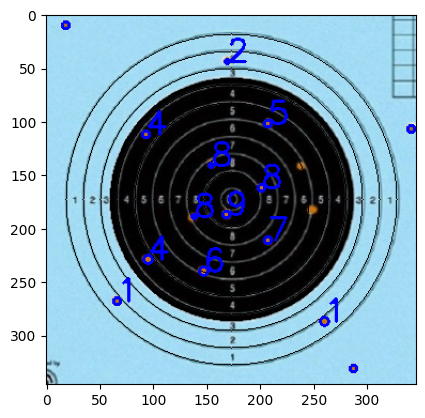

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

width2 = 400
height2 = 400
# Charger l'image de la cible avant les tirs
before_image = cv2.imread("center.jpg")

# Charger l'image de la cible après les tirs
after_image = cv2.imread("center_after_3.jpg")

#Redimensioner les images pour qu'elles ont les même dimensions
before_image = cv2.resize(before_image,(width2,height2))
after_image = cv2.resize(after_image,(width2,height2))

# Convertir les images en nuances de gris pour faciliter le calcul de la différence
before_gray = cv2.cvtColor(before_image, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after_image, cv2.COLOR_BGR2GRAY)


# Appliquer une réduction de bruit pour faciliter la détection de cercles
gray_before = cv2.medianBlur(before_gray, 5)
gray_after = cv2.medianBlur(after_gray, 5)

# Détecter les cercles dans les images
circles_before = cv2.HoughCircles(gray_before, cv2.HOUGH_GRADIENT, 1, 20, param1=150, param2=30, minRadius=0, maxRadius=0)
circles_after = cv2.HoughCircles(gray_after, cv2.HOUGH_GRADIENT, 1, 30, param1=150, param2=150, minRadius=0, maxRadius=0)

# Extraire les coordonnées x, y, et rayon du cercle dans les images
x1, y1, r1 = int(circles_before[0, 0, 0]), int(circles_before[0, 0, 1]), int(circles_before[0, 0, 2])
x2, y2, r2 = int(circles_after[0, 0, 0]), int(circles_after[0, 0, 1]), int(circles_after[0, 0, 2])

before_image = cv2.cvtColor(before_image, cv2.COLOR_BGR2RGB)
cv2.circle(before_image, (x1, y1), r1, (0,0,0), 2)
before_image = cv2.cvtColor(before_image, cv2.COLOR_BGR2RGB)
cv2.circle(after_image, (x2, y2), r2, (0,0,0), 2)

# //////////////////////
before_cropped = before_image[y1-r1-60:y1+r1+60, x1-r1-60:x1+r1+60]
after_cropped = after_image[y2-r2-60:y2+r2+60, x2-r2-60:x2+r2+60]
after_cropped = cv2.resize(after_cropped, (before_cropped.shape[1], before_cropped.shape[0]))
result = cv2.addWeighted(before_cropped, 0.5, after_cropped, 0.5, 0)
# //////////////////////

height, width, channels = after_cropped.shape



# Calculer la différence entre les deux images en nuances de gris
diff = cv2.absdiff(before_cropped, after_cropped)

diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

# Appliquer un seuil pour mettre en évidence les différences
_, threshold = cv2.threshold(diff, 80, 255, cv2.THRESH_BINARY)

# Utiliser l'opération morphologique "opening" pour éliminer les bruits
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
threshold = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations = 2)

# Trouver les contours des zones modifiées
# contours = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
contours = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

# Initialiser un compteur de points
points = 0

# Définir les centres et les rayons des cercles de points
circles = {
    "10": ((width // 2, height // 2), width // 38),
    "9": ((width // 2, height // 2), width // 13),
    "8": ((width // 2, height // 2), width // 8.4),
    "7": ((width // 2, height // 2), width // 6),
    "6": ((width // 2, height // 2), width // 4.7),
    "5": ((width // 2, height // 2), width // 3.8),
    "4": ((width // 2, height // 2), width // 3.2),
    "3": ((width // 2, height // 2), width // 2.8),
    "2": ((width // 2, height // 2), width // 2.48),
    "1": ((width // 2, height // 2), width // 2.22)
}

for _, (center, radius) in circles.items():
    radius = int(radius)
    cv2.circle(after_cropped, center, radius, (0,0,0), 1)


# Dessiner des cercles rouges autour des impacts de balle
total_points = 0
points = {point: 0 for point in circles.keys()}
for c in contours:
    (x, y, w, h)= cv2.boundingRect(c)
    cv2.circle(after_cropped, (x + w // 2, y + h // 2), w // 2, (0, 0, 255), 2)
    
    center = (x + w // 2, y + h // 2)
    for point, (circle_center, radius) in circles.items():
        distance = cv2.norm(np.array(center), np.array(circle_center))
        if distance <= radius:
            points[point] += 1
            cv2.putText(after_cropped, point, (x + w // 2, y + h // 2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            total_points += int(point)
            break


print("Total points: ", total_points)

print("nombre d'impacts dans la cible: ", sum(points.values()))
print("nombre d'impacts aux total sur le carton: ", len(contours))
# cv2.imshow("before_image", before_image)
# cv2.imshow("result", after_image)
cv2.imshow("Nombre de points : "+ str(total_points), after_cropped)
# cv2.imshow("result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(after_cropped)
plt.show()

Total points:  61
nombre d'impacts dans la cible:  12
nombre d'impacts aux total sur le carton:  15


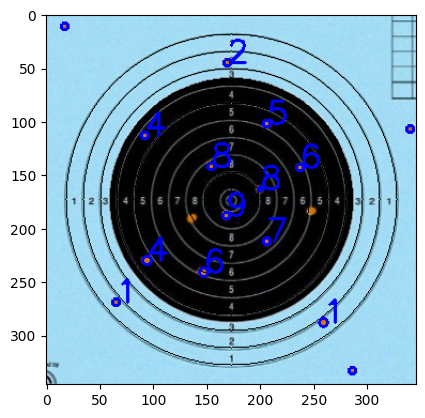

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

width2 = 400
height2 = 400
# Charger l'image de la cible avant les tirs
before_image = cv2.imread("center.jpg")

# Charger l'image de la cible après les tirs
after_image = cv2.imread("center_after_2.jpg")

#Redimensioner les images pour qu'elles ont les même dimensions
before_image = cv2.resize(before_image,(width2,height2))
after_image = cv2.resize(after_image,(width2,height2))

# Convertir les images en nuances de gris pour faciliter le calcul de la différence
before_gray = cv2.cvtColor(before_image, cv2.COLOR_BGR2GRAY)
after_gray = cv2.cvtColor(after_image, cv2.COLOR_BGR2GRAY)


# Appliquer une réduction de bruit pour faciliter la détection de cercles
gray_before = cv2.medianBlur(before_gray, 5)
gray_after = cv2.medianBlur(after_gray, 5)


# Détecter les cercles dans les images
circles_before = cv2.HoughCircles(gray_before, cv2.HOUGH_GRADIENT, 1, 20, param1=150, param2=30, minRadius=0, maxRadius=0)
circles_after = cv2.HoughCircles(gray_after, cv2.HOUGH_GRADIENT, 1, 30, param1=200, param2=20, minRadius=0, maxRadius=0)

# it is possible for the moment that it is necessary to change the parameters of the top according to the image after that the user enters 
# param1=200, param2=20

# Extraire les coordonnées x, y, et rayon du cercle dans les images
x1, y1, r1 = int(circles_before[0, 0, 0]), int(circles_before[0, 0, 1]), int(circles_before[0, 0, 2])
x2, y2, r2 = int(circles_after[0, 0, 0]), int(circles_after[0, 0, 1]), int(circles_after[0, 0, 2])

before_image = cv2.cvtColor(before_image, cv2.COLOR_BGR2RGB)
cv2.circle(before_image, (x1, y1), r1, (0,0,0), 2)
before_image = cv2.cvtColor(before_image, cv2.COLOR_BGR2RGB)
cv2.circle(after_image, (x2, y2), r2, (0,0,0), 2)

# //////////////////////
before_cropped = before_image[y1-r1-60:y1+r1+60, x1-r1-60:x1+r1+60]
after_cropped = after_image[y2-r2-60:y2+r2+60, x2-r2-60:x2+r2+60]
after_cropped = cv2.resize(after_cropped, (before_cropped.shape[1], before_cropped.shape[0]))
result = cv2.addWeighted(before_cropped, 0.5, after_cropped, 0.5, 0)
# //////////////////////

height, width, channels = after_cropped.shape



# Calculer la différence entre les deux images en nuances de gris
diff = cv2.absdiff(before_cropped, after_cropped)

diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)

# Appliquer un seuil pour mettre en évidence les différences
_, threshold = cv2.threshold(diff, 80, 255, cv2.THRESH_BINARY)

# Utiliser l'opération morphologique "opening" pour éliminer les bruits
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
threshold = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel, iterations = 2)

# Trouver les contours des zones modifiées
# contours = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]
contours = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0]

# Initialiser un compteur de points
points = 0

# Définir les centres et les rayons des cercles de points
circles = {
    "10": ((width // 2, height // 2), width // 38),
    "9": ((width // 2, height // 2), width // 13),
    "8": ((width // 2, height // 2), width // 8.4),
    "7": ((width // 2, height // 2), width // 6),
    "6": ((width // 2, height // 2), width // 4.7),
    "5": ((width // 2, height // 2), width // 3.8),
    "4": ((width // 2, height // 2), width // 3.2),
    "3": ((width // 2, height // 2), width // 2.8),
    "2": ((width // 2, height // 2), width // 2.48),
    "1": ((width // 2, height // 2), width // 2.22)
}

for _, (center, radius) in circles.items():
    radius = int(radius)
    cv2.circle(after_cropped, center, radius, (0,0,0), 1)


# Dessiner des cercles rouges autour des impacts de balle
total_points = 0
points = {point: 0 for point in circles.keys()}
for c in contours:
    (x, y, w, h)= cv2.boundingRect(c)
    cv2.circle(after_cropped, (x + w // 2, y + h // 2), w // 2, (0, 0, 255), 2)
    
    center = (x + w // 2, y + h // 2)
    for point, (circle_center, radius) in circles.items():
        distance = cv2.norm(np.array(center), np.array(circle_center))
        if distance <= radius:
            points[point] += 1
            cv2.putText(after_cropped, point, (x + w // 2, y + h // 2), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
            total_points += int(point)
            break


print("Total points: ", total_points)

print("nombre d'impacts dans la cible: ", sum(points.values()))
print("nombre d'impacts aux total sur le carton: ", len(contours))
cv2.imshow("Nombre de points : "+ str(total_points), after_cropped)
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.imshow(after_cropped)
plt.show()